In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
chosen = pd.read_csv('chosen.csv')
chosen.head()

,item_cnt_month,mean_month_shop,mean_month_cat,mean_by_year,item_cnt_1_ago,item_cnt_2_ago,item_cnt_3_ago,item_cnt_4_ago
0,1.0,0.034671,0.151543,0.085368,1.0,1.0,1.0,1.0
1,0.0,0.033333,0.151543,0.085368,0.0,0.0,0.0,0.0
2,0.0,0.051541,0.151543,0.085368,2.0,2.0,0.0,0.0
3,0.0,0.050038,0.151543,0.085368,0.0,0.0,0.0,0.0
4,0.0,0.111111,0.151543,0.085368,0.0,3.0,1.0,3.0


In [3]:
chosen[chosen.isna().any(axis=1)]

,item_cnt_month,mean_month_shop,mean_month_cat,mean_by_year,item_cnt_1_ago,item_cnt_2_ago,item_cnt_3_ago,item_cnt_4_ago


In [4]:
chosen['item_cnt_month'].value_counts()

0.000000e+00     8051990
1.000000e+00      897499
2.000000e+00      227553
3.000000e+00       88164
4.000000e+00       45462
5.000000e+00       27138
6.000000e+00       17536
7.000000e+00       11945
2.000000e+01       10705
8.000000e+00        8828
9.000000e+00        6367
1.000000e+01        5104
1.100000e+01        3786
1.200000e+01        3131
1.300000e+01        2572
1.400000e+01        2048
1.500000e+01        1750
1.600000e+01        1460
1.700000e+01        1323
1.800000e+01        1069
1.900000e+01         954
3.315618e-316          1
Name: item_cnt_month, dtype: int64

In [5]:
chosen[(chosen['item_cnt_month'] < 1) & (chosen['item_cnt_month'] > 0)]

,item_cnt_month,mean_month_shop,mean_month_cat,mean_by_year,item_cnt_1_ago,item_cnt_2_ago,item_cnt_3_ago,item_cnt_4_ago
1064113,3.315618e-316,0.027951,0.05481,0.085368,0.0,0.0,0.0,0.0


In [6]:
chosen.drop(1064113, axis=0, inplace=True)
chosen['item_cnt_month'].value_counts()

0.0     8051990
1.0      897499
2.0      227553
3.0       88164
4.0       45462
5.0       27138
6.0       17536
7.0       11945
20.0      10705
8.0        8828
9.0        6367
10.0       5104
11.0       3786
12.0       3131
13.0       2572
14.0       2048
15.0       1750
16.0       1460
17.0       1323
18.0       1069
19.0        954
Name: item_cnt_month, dtype: int64

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
import time
start = time.time()
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in splitter.split(chosen, chosen['item_cnt_month']):
    X_train = chosen.loc[train_index].drop('item_cnt_month', axis=1)
    y_train = chosen.loc[train_index]['item_cnt_month']
    X_test = chosen.loc[test_index].drop('item_cnt_month', axis=1)
    y_test = chosen.loc[test_index]['item_cnt_month']
# print('Run time: {} minutes.'.format(round((time.time() - start) / 60)))
print('Run time: {} seconds.'.format(time.time() - start))

C:\Users\Chris\Anaconda3\envs\DataScience1\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\Users\Chris\Anaconda3\envs\DataScience1\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


Run time: 9.243976831436157 seconds.


In [10]:
X_train.shape

(7062288, 7)

In [11]:
y_train.shape

(7062288,)

In [12]:
X_test.shape

(2354096, 7)

In [13]:
y_test.shape

(2354096,)

In [17]:
y_train.value_counts() / y_train.shape[0]

0.0     0.855038
1.0     0.095355
2.0     0.024169
3.0     0.009367
4.0     0.004839
5.0     0.002875
6.0     0.001853
7.0     0.001285
20.0    0.001139
8.0     0.000932
9.0     0.000675
10.0    0.000540
11.0    0.000407
12.0    0.000335
13.0    0.000275
14.0    0.000217
15.0    0.000187
16.0    0.000156
17.0    0.000142
18.0    0.000113
19.0    0.000102
Name: item_cnt_month, dtype: float64

In [18]:
y_test.value_counts() / y_test.shape[0]

0.0     0.855303
1.0     0.095186
2.0     0.024156
3.0     0.009351
4.0     0.004795
5.0     0.002903
6.0     0.001891
7.0     0.001219
20.0    0.001129
8.0     0.000953
9.0     0.000681
10.0    0.000548
11.0    0.000387
12.0    0.000325
13.0    0.000268
14.0    0.000218
15.0    0.000183
16.0    0.000151
17.0    0.000137
18.0    0.000114
19.0    0.000101
Name: item_cnt_month, dtype: float64

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [14]:
X_train.max(axis=0)

mean_month_shop     0.697519
mean_month_cat     34.363889
mean_by_year        0.085368
item_cnt_1_ago     20.000000
item_cnt_2_ago     20.000000
item_cnt_3_ago     20.000000
item_cnt_4_ago     20.000000
dtype: float64

In [15]:
y_train.max()

20.0

In [20]:
X_train[X_train.isna().any(axis=1)]

,mean_month_shop,mean_month_cat,mean_by_year,item_cnt_1_ago,item_cnt_2_ago,item_cnt_3_ago,item_cnt_4_ago
1064113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
X_train.drop(1064113, axis=0, inplace=True)

In [22]:
X_train[X_train.isna().any(axis=1)]

,mean_month_shop,mean_month_cat,mean_by_year,item_cnt_1_ago,item_cnt_2_ago,item_cnt_3_ago,item_cnt_4_ago


In [24]:
y_train.drop(1064113, inplace=True)

In [25]:
gbr = GradientBoostingRegressor()
start = time.time()
gbr.fit(X_train, y_train)
print('Run time: {} minutes.'.format(round((time.time() - start) / 60)))

Run time: 8 minutes.


In [26]:
from sklearn.metrics import mean_squared_error

In [28]:
train_preds = gbr.predict(X_train)

In [29]:
np.sqrt(mean_squared_error(y_train, train_preds))

0.9414885532352254

In [30]:
train_preds.mean()

0.29414918991539524

In [43]:
y_train.mean()

0.2941491899153914

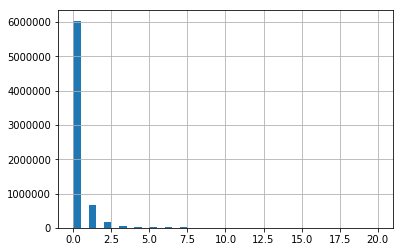

In [32]:
y_train.hist(bins=40)

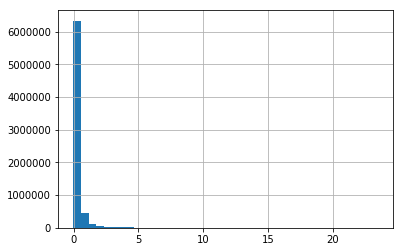

In [35]:
pd.Series(train_preds).hist(bins=40)

In [36]:
gbr.feature_importances_

array([0.02553551, 0.05802907, 0.00344688, 0.80823397, 0.04835386,
       0.03890313, 0.01749758])

In [37]:
gbr.train_score_

array([1.381456  , 1.30428097, 1.24113091, 1.18888176, 1.14534024,
       1.10952265, 1.07884022, 1.05373579, 1.03228455, 1.01439535,
       0.99963327, 0.98692649, 0.9758166 , 0.96654545, 0.95867839,
       0.95195384, 0.94592206, 0.94105152, 0.93641963, 0.93238427,
       0.92863661, 0.9253048 , 0.92248426, 0.91977241, 0.91752094,
       0.91536419, 0.9135693 , 0.91190862, 0.91013927, 0.90870852,
       0.90731856, 0.9061407 , 0.90497304, 0.90402942, 0.90315037,
       0.90213145, 0.90143016, 0.90062663, 0.89984661, 0.89925455,
       0.8986993 , 0.89806738, 0.89757631, 0.89704016, 0.89661103,
       0.89611104, 0.89577353, 0.89543764, 0.89505752, 0.8947076 ,
       0.89433976, 0.89405828, 0.8938461 , 0.89361995, 0.89338271,
       0.89305088, 0.89286893, 0.89261251, 0.89243425, 0.89227414,
       0.89207072, 0.89191338, 0.89163831, 0.89140229, 0.89124539,
       0.89097673, 0.89077663, 0.890591  , 0.89041408, 0.89024579,
       0.89006675, 0.88996469, 0.88982333, 0.88970996, 0.88955

In [42]:
start = time.time()
tol = 0.0001
results = []
for max_depth in [3, 5, 7]:
    for learning_rate in [0.200, 0.150, 0.100, 0.075, 0.050, 0.025]:
        gbr = GradientBoostingRegressor(max_depth=max_depth, learning_rate=learning_rate, warm_start=True)
        test_error = 1000
        best_n_estimators = 0
        n_iter_no_change = 0
        train_start = time.time()
        for n_estimators in range(1, 301):
            gbr.n_estimators = n_estimators
            gbr.fit(X_train, y_train)
            test_preds = gbr.predict(X_test)
            last_error = test_error
            test_error = mean_squared_error(y_test, test_preds)
            if last_error - test_error > tol:
                # Significant improvement
                best_n_estimators = n_estimators
                best_error = test_error
            else:
                n_iter_no_change += 1
            if n_iter_no_change == 5:
                break
        train_time = round((time.time() - train_start) / 60, 1)
        results.append([max_depth, learning_rate, best_n_estimators, round(best_error, 2), train_time])
        print('Complete: max_depth={}, learning_rate={}, best_n_estimators={}, mse={}, train time={} minutes.'\
             .format(max_depth, learning_rate, best_n_estimators, round(best_error, 2), train_time))
print('Run time: {} minutes.'.format(round((time.time() - start) / 60, 1)))

Complete: max_depth=3, learning_rate=0.2, best_n_estimators=63, mse=0.88, train time=13.3 minutes.
Complete: max_depth=3, learning_rate=0.15, best_n_estimators=64, mse=0.89, train time=13.7 minutes.
Complete: max_depth=3, learning_rate=0.1, best_n_estimators=84, mse=0.89, train time=19.8 minutes.
Complete: max_depth=3, learning_rate=0.075, best_n_estimators=99, mse=0.89, train time=29.8 minutes.
Complete: max_depth=3, learning_rate=0.05, best_n_estimators=121, mse=0.89, train time=56.1 minutes.
Complete: max_depth=3, learning_rate=0.025, best_n_estimators=188, mse=0.89, train time=130.6 minutes.
Complete: max_depth=5, learning_rate=0.2, best_n_estimators=72, mse=0.86, train time=66.3 minutes.
Complete: max_depth=5, learning_rate=0.15, best_n_estimators=70, mse=0.87, train time=66.4 minutes.
Complete: max_depth=5, learning_rate=0.1, best_n_estimators=86, mse=0.87, train time=77.7 minutes.
Complete: max_depth=5, learning_rate=0.075, best_n_estimators=92, mse=0.87, train time=38.6 minutes

In [45]:
results1 = pd.DataFrame(results, columns=['max_depth', 'learning_rate', 'n_estimators', 'mse', 'time'])
results1

,max_depth,learning_rate,n_estimators,mse,time
0,3,0.200,63,0.88,13.3
1,3,0.150,64,0.89,13.7
2,3,0.100,84,0.89,19.8
3,3,0.075,99,0.89,29.8
4,3,0.050,121,0.89,56.1
5,3,0.025,188,0.89,130.6
6,5,0.200,72,0.86,66.3
7,5,0.150,70,0.87,66.4
8,5,0.100,86,0.87,77.7
9,5,0.075,92,0.87,38.6


In [ ]:
param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.25, 0.2, 0.15, 0.1, 0.075, 0.05, 0.025],
             'n_estimators': [100, 200, 300]}

In [47]:
start = time.time()
tol = 0.0001
results = []
for max_depth in [9, 11, 13]:
    for learning_rate in [0.200, 0.100, 0.050]:
        gbr = GradientBoostingRegressor(max_depth=max_depth, learning_rate=learning_rate, warm_start=True)
        test_error = 1000
        best_n_estimators = 0
        n_iter_no_change = 0
        train_start = time.time()
        for n_estimators in range(20, 301, 2):
            gbr.n_estimators = n_estimators
            gbr.fit(X_train, y_train)
            test_preds = gbr.predict(X_test)
            last_error = test_error
            test_error = mean_squared_error(y_test, test_preds)
            if last_error - test_error > tol:
                # Significant improvement
                best_n_estimators = n_estimators
                best_error = test_error
            else:
                n_iter_no_change += 1
            if n_iter_no_change == 5:
                break
        best_error = round(best_error, 3)
        train_time = round((time.time() - train_start) / 60, 1)
        results.append([max_depth, learning_rate, best_n_estimators, best_error, train_time])
        print('Complete: max_depth={}, learning_rate={}, best_n_estimators={}, mse={}, train time={} minutes.'\
             .format(max_depth, learning_rate, best_n_estimators, best_error, train_time))
print('Run time: {} minutes.'.format(round((time.time() - start) / 60, 1)))

Complete: max_depth=9, learning_rate=0.2, best_n_estimators=86, mse=0.828, train time=135.2 minutes.
Complete: max_depth=9, learning_rate=0.1, best_n_estimators=136, mse=0.829, train time=230.3 minutes.
Complete: max_depth=9, learning_rate=0.05, best_n_estimators=176, mse=0.837, train time=319.2 minutes.


KeyboardInterrupt: 

In [48]:
results2 = pd.DataFrame(results, columns=['max_depth', 'learning_rate', 'n_estimators', 'mse', 'time'])
results2

,max_depth,learning_rate,n_estimators,mse,time
0,9,0.20,86,0.828,135.2
1,9,0.10,136,0.829,230.3
2,9,0.05,176,0.837,319.2


In [ ]:
start = time.time()
tol = 0.00025
results = []
for max_depth in [3, 5, 7, 9, 11, 13]:
    for learning_rate in [0.4, 0.3, 0.2, 0.1]:
        gbr = GradientBoostingRegressor(max_depth=max_depth, learning_rate=learning_rate, warm_start=True)
        test_error = 1000
        best_n_estimators = 0
        n_iter_no_change = 0
        train_start = time.time()
        for n_estimators in range(20, 301, 3):
            gbr.n_estimators = n_estimators
            gbr.fit(X_train, y_train)
            test_preds = gbr.predict(X_test)
            last_error = test_error
            test_error = mean_squared_error(y_test, test_preds)
            if last_error - test_error > tol:
                # Significant improvement
                best_n_estimators = n_estimators
                best_error = test_error
                n_iter_no_change = 0
            else:
                n_iter_no_change += 1
            if n_iter_no_change == 3:
                break
        best_error = round(best_error, 3)
        train_time = round((time.time() - train_start) / 60, 1)
        results.append([max_depth, learning_rate, best_n_estimators, best_error, train_time])
        print('Complete: max_depth={}, learning_rate={}, best_n_estimators={}, mse={}, train time={} minutes.'\
             .format(max_depth, learning_rate, best_n_estimators, best_error, train_time))
print('Run time: {} minutes.'.format(round((time.time() - start) / 60, 1)))

Complete: max_depth=3, learning_rate=0.4, best_n_estimators=140, mse=0.867, train time=21.7 minutes.
Complete: max_depth=3, learning_rate=0.3, best_n_estimators=152, mse=0.868, train time=24.2 minutes.
Complete: max_depth=3, learning_rate=0.2, best_n_estimators=134, mse=0.874, train time=20.5 minutes.
Complete: max_depth=3, learning_rate=0.1, best_n_estimators=101, mse=0.884, train time=15.1 minutes.
Complete: max_depth=5, learning_rate=0.4, best_n_estimators=164, mse=0.839, train time=50.7 minutes.
Complete: max_depth=5, learning_rate=0.3, best_n_estimators=137, mse=0.843, train time=41.3 minutes.
Complete: max_depth=5, learning_rate=0.2, best_n_estimators=182, mse=0.843, train time=58.0 minutes.
Complete: max_depth=5, learning_rate=0.1, best_n_estimators=218, mse=0.852, train time=72.9 minutes.
Complete: max_depth=7, learning_rate=0.4, best_n_estimators=101, mse=0.831, train time=65.2 minutes.
Complete: max_depth=7, learning_rate=0.3, best_n_estimators=98, mse=0.834, train time=63.5 